In [1]:
%matplotlib inline

import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from skimage import measure
import itertools
sys.path.append("/Users/yves/Documents/Code/structural_knowledge/action_generalisation/")

import torch as tf

In [237]:

def make_matrix_from(maze):
    
    def in_maze(s):
        return s[0] >= 0 and s[0] < maze.shape[0] and s[1] >= 0 and s[1] < maze.shape[1]

    def is_free(s):
        return maze[s[0],s[1]] == 1

    def valid_state(s):
        return in_maze(s) and is_free(s)
    
    states = [np.array(s) for s in itertools.product(range(maze.shape[0]), range(maze.shape[1])) if maze[s[0], s[1]] == 1]
    Ta = np.eye(len(states))
    idx = np.zeros(maze.shape, dtype=np.int)
    c = 0
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                continue
            idx[i, j] = c
            c += 1
    
    for i, state in enumerate(states):
        possible_next_states = [state + d for d in np.array([[1,0],[-1,0],[0,1],[0,-1]])]
        filtered = list(filter(valid_state, possible_next_states))
        for f in filtered:
            Ta[i, idx[f[0], f[1]]] = 1
            Ta[idx[f[0], f[1]], i] = 1
    return Ta, idx


In [238]:
import env_gen

In [239]:
Nx = 10
Ny = 10
M = env_gen.generate_random_connected_maze(Nx,Ny,100)

In [240]:
M = np.eye(8)
M[0,1] = 1
M[1,2] = 1
M[2,5] = 1
M[3,4] = 1
M[4,5] = 1
M[5,6] = 1
M[6,7] = 1

M = -(M + M.T)
M = M/np.sum(M,axis=0)[:,None]
M[np.diag_indices_from(M)] = 1

In [241]:
M = np.zeros([6,6])
M[1,1] = 1
M[1,2] = 1
M[3,1] = 1
M[3,2] = 1
M[2,2] = 1
M[2,3] = 1
M[2,4] = 1
M[2,5] = 1

In [285]:
M = np.zeros([6,6])
M[1,:-1] = 1
M[3,:-1] = 1
M[2,-2] = 1
#M[3,2] = 1
#M[2,2] = 1
#M[2,3] = 1
#M[2,4] = 1
#M[2,5] = 1

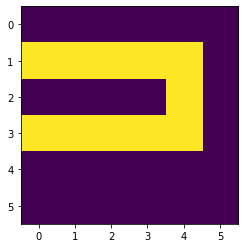

In [286]:
plt.imshow(M)

In [287]:


protect = np.array(list(itertools.product(range(5), range(5)) ))


In [288]:
M[protect[0]][:,protect[1]].shape

(2, 2)

In [289]:

def generate_env_constrained(Mstart,protect,n_elim,verbose=False):

    all_labels = measure.label(Mstart)

    M = np.ones_like(Mstart)
    for ix in protect:
        M[ix[0],ix[1]] = Mstart[ix[0],ix[1]]   
    Nx,Ny = Mstart.shape
    for _ in range(n_elim):
        Mdash = M.copy()
        updX,updY = (np.random.randint(0,Nx),np.random.randint(0,Ny))
        
        if not np.any([np.all([updX,updY]==i) for i in protect]):
            if verbose: print((updX,updY),'no')
            Mdash[updX,updY] = 0
            all_labels = measure.label(Mdash,connectivity=1)
            if len(np.unique(all_labels))<=2:
                M = Mdash
        else:
            if verbose: print((updX,updY),'yes')

    return M

In [290]:
#M2 = generate_env_constrained(M,protect,500)

In [291]:
idx

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0],
       [0, 0, 3, 4, 5, 6],
       [0, 7, 8, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

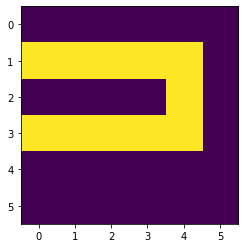

In [292]:
plt.imshow(M)

In [293]:


gamma = 0.9
M_set = []
SR_set = []
nM = 100
protect = itertools.product(range(5), range(5)) 
for i in range(nM):
    m_ = generate_env_constrained(M.copy(),protect,50)
    M_set.append(m_)
    
    
    T,state_indices = make_matrix_from(m_)
    T[np.diag_indices_from(T)] = 0
    T = T/np.sum(T,axis=1)[None,:]
    SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)
    
    

    SR_set.append(SR)

In [318]:
T,idx = make_matrix_from(M)

idx[idx>0] += 1
#idx[1,1] = 1
idx[1,0] = 1


T[np.diag_indices_from(T)] = 0
T = T/np.sum(T,axis=1)[None,:]

In [319]:
len(eigenval)

11

In [320]:
eigenval,v = np.linalg.eig(T)

In [321]:
eigenval,v = np.linalg.eig(T)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [322]:
gamma = 0.9
SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)


eigenval,v = np.linalg.eig(SR)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [323]:
def draw_vec_onto_maze(M,v,state_indices):
    ev_draw = np.zeros_like(M)
    Nx,Ny = M.shape
    for i in range(Nx):
        for j in range(Ny):
            #ix = np.where(idx=)
            ev_draw[i,j] = v[idx[i,j]]
            
    fin = np.ma.masked_where(idx==0,ev_draw)
    return ev_draw, ed

In [324]:
idx[i,j]

0

In [360]:
ev_draw = np.zeros_like(M)
Nx,Ny = M.shape
for i in range(Nx):
    for j in range(Ny):
        #ix = np.where(idx=)
        ev_draw[i,j] = v[:,3][idx[i,j]-1]

In [361]:
fin = np.ma.masked_where(idx==0,ev_draw)

In [362]:
from sklearn.decomposition import PCA

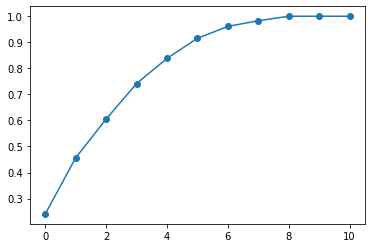

In [363]:
plt.plot(np.cumsum(PCA().fit(T).explained_variance_ratio_),marker='o')

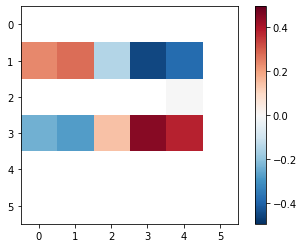

In [364]:
fin = np.ma.masked_where(idx==0,ev_draw)
mx = mn = np.max(np.abs(fin))*1.1
plt.imshow(fin,vmax=mx,vmin=-mx,cmap='RdBu_r')
plt.colorbar()

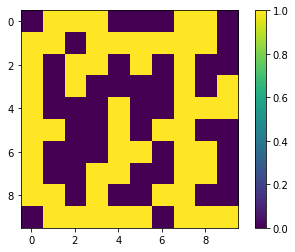

In [787]:
plt.imshow(M)
plt.colorbar()

In [798]:
lamda = .99
alpha=.5

In [799]:
pos = 10  #current position

e = np.zeros(len(SR)) +1 #eligibility trace
rg = np.arange(len(SR))  #
walk_path = []

SRTD = np.zeros_like(SR)

for i in range(100000):
    
    #updates eligibility traces
    #e[pos] = lamda*gamma*e[pos] + 1
    #e[np.isin(rg,pos)==False] = lamda*gamma*e[pos]  #gives boolean vetor true at current location
    #e 
    #available options
    options = np.where(T[:,pos])[0]

    newP = np.random.choice(options,p=T[:,pos][options])
    walk_path.append(newP)
    zrs = np.zeros(len(SR))
    zrs[pos] = 1.
    SRTD[pos,:] = SRTD[pos,:] + alpha*(zrs + gamma*SRTD[newP,:] - SRTD[pos,:])*e
    SRTD = (SRTD + SRTD.T)/2.
    pos = newP.copy()

In [800]:


eigenval,v = np.linalg.eig(SRTD)
v = v[:,np.argsort((eigenval))[::-1]]
eigenval = eigenval[np.argsort((eigenval))[::-1]]

In [801]:
ev_draw = np.zeros_like(M)
Nx,Ny = M.shape
for i in range(Nx):
    for j in range(Ny):
        #ix = np.where(idx=)
        ev_draw[i,j] = v[:,2][idx[i,j]]

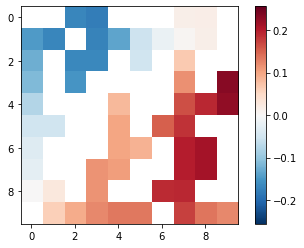

In [802]:
fin = np.ma.masked_where(idx==0,ev_draw)
mx = mn = np.max(np.abs(fin))*1.1
plt.imshow(fin,vmax=mx,vmin=-mx,cmap='RdBu_r')
plt.colorbar()